<a href="https://colab.research.google.com/github/caumannerman/Tensorflow_practice/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout



In [19]:
# mnist data불러옴
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [21]:
# -1은 현상 유지한다는 뜻 

# 텐서로 변환하는 것.
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [22]:
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [23]:
x_train.dtype

dtype('uint8')

In [24]:
# 타입 변환 + "정규화"
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

In [25]:
print(x_train[0][0])
print(x_train.dtype, x_test.dtype)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
float32 float32


# CNN 모델 구축

In [26]:
cnn = Sequential()

## Layer 추가

In [27]:
# Conv층 2개 
cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3),filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3),filters=64, activation='relu'))
# Pooling
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

# Feature Extractor ==> Classifier 사이 Flatten
# 3차원 이미지를 1차원 벡터로!
cnn.add(Flatten())

# Classifier
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [28]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [29]:
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 35s 9ms/step - loss: 0.2448 - accuracy: 0.9250 - val_loss: 0.0516 - val_accuracy: 0.9844
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0861 - accuracy: 0.9739 - val_loss: 0.0383 - val_accuracy: 0.9879
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0627 - accuracy: 0.9809 - val_loss: 0.0324 - val_accuracy: 0.9891
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0516 - accuracy: 0.9848 - val_loss: 0.0297 - val_accuracy: 0.9898
Epoch 5/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0435 - accuracy: 0.9866 - val_loss: 0.0291 - val_accuracy: 0.9896
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.0278 - val_accuracy: 0.9911
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0284 - val_accuracy: 0.9914
Epoch

In [30]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0290 - accuracy: 0.9939


[0.028981246054172516, 0.9939000010490417]

In [31]:
import matplotlib.pyplot as plt

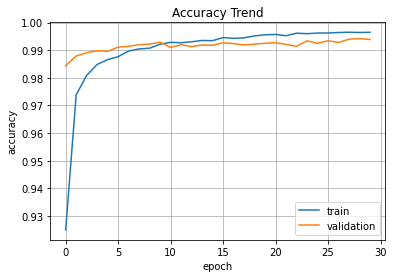

In [32]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

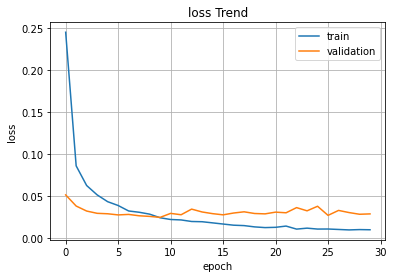

In [33]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

In [ ]:
$$ 

CNN_ MNIST DATA Classification !

The End